In [142]:
#Importing required libraries


import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


In [2]:
def fetch_nasa_data(api_endpoint):
    try:
        # Send a GET request to the API endpoint
        response = requests.get(api_endpoint)
        response.raise_for_status()
        # Parse the response data (assuming JSON)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
# Define the API endpoint for NASA data
api_endpoint = "https://data.nasa.gov/resource/gquh-watm.json"
data = fetch_nasa_data(api_endpoint)
print(data)

[{'center': 'NASA Kennedy Space Center', 'status': 'Application', 'case_number': 'KSC-12871', 'patent_number': '0', 'application_sn': '13/033,085', 'title': 'Polyimide Wire Insulation Repair System'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14048-1', 'patent_number': '5694939', 'application_sn': '08/543,093', 'title': 'Autogenic-Feedback Training Exercise Method & System', 'patent_expiration_date': '2015-10-03T00:00:00.000'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14231-1', 'patent_number': '6109270', 'application_sn': '09/017,519', 'title': 'Multimodality Instrument For Tissue Characterization', 'patent_expiration_date': '2017-02-04T00:00:00.000'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14231-2DIV', 'patent_number': '6976013', 'application_sn': '10/874,003', 'title': 'Metrics For Body Sensing System', 'patent_expiration_date': '2024-06-16T00:00:00.000'}, {'center':

In [14]:
#creating a DataFrame
Patent_df=pd.DataFrame(data)

In [15]:
Patent_df

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,NaN
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03T00:00:00.000
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16T00:00:00.000
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,NaN,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09T00:00:00.000
996,NASA Glenn Research Center,Application,LEW-18928-1,NaN,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,NaN
997,NASA Glenn Research Center,Application,LEW-18934-1,NaN,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23T00:00:00.000
998,NASA Glenn Research Center,Application,LEW-18939-1,NaN,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13T00:00:00.000


In [16]:
#Columns in the DataFrame
Patent_df.columns

Index(['center', 'status', 'case_number', 'patent_number', 'application_sn',
       'title', 'patent_expiration_date'],
      dtype='object')

In [17]:
Patent_df.head(5)

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,NaN
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03T00:00:00.000
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16T00:00:00.000
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000


Data Cleaning and Preparation

In [19]:
def clean_data(dt):
    df = pd.DataFrame(data)
    #Replacing NaN values in patent_number column of dataframe to 'pending'
    df['patent_number'] = df['patent_number'].replace(np.NaN, 'pending')
    df['patent_expiration_date'] = pd.to_datetime(df['patent_expiration_date']).fillna(pd.Timestamp.now()).dt.date
    return df

New_df = clean_data(Patent_df)
New_df



,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,2024-10-05
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,pending,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09
996,NASA Glenn Research Center,Application,LEW-18928-1,pending,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,2024-10-05
997,NASA Glenn Research Center,Application,LEW-18934-1,pending,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23
998,NASA Glenn Research Center,Application,LEW-18939-1,pending,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13


In [22]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   center                  1000 non-null   object
 1   status                  1000 non-null   object
 2   case_number             1000 non-null   object
 3   patent_number           1000 non-null   object
 4   application_sn          998 non-null    object
 5   title                   1000 non-null   object
 6   patent_expiration_date  1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [23]:
New_df.dtypes

center                    object
status                    object
case_number               object
patent_number             object
application_sn            object
title                     object
patent_expiration_date    object
dtype: object

In [24]:

New_df['patent_expiration_date']= pd.to_datetime(New_df['patent_expiration_date'])
New_df['patent_expiration_date'].dt.year

0      2024
1      2015
2      2017
3      2024
4      2017
       ... 
995    2033
996    2024
997    2033
998    2033
999    2033
Name: patent_expiration_date, Length: 1000, dtype: int32


## Exploratory Data Analysis (EDA)

In this section, we explore the dataset through summary statistics and visualizations to understand the distribution of data and identify patterns.


In [27]:
#Descriptive Statistics of the Dataframe
New_df.describe(include="all")

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
count,1000,1000,1000,1000,998,1000,1000
unique,8,2,1000,647,994,929,NaN
top,NASA Langley Research Center,Issued,KSC-12871,pending,"11/213,604",Otoacoustic Protection In Biologically-Inspire...,NaN
freq,349,646,1,224,2,6,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-23 17:59:59.999999744
min,NaN,NaN,NaN,NaN,NaN,NaN,1930-06-29 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-05 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-21 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,2029-06-04 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,2034-03-10 00:00:00


In [26]:
def analyze_patents(df):
    unique_applications = New_df['application_sn'].nunique()
    # Dropping duplicate rows 
    df_cleaned = New_df.drop_duplicates(subset='application_sn', keep='first')
    return unique_applications, df_cleaned
unique_applications, df_cleaned = analyze_patents(df)
print(f"Unique applications: {unique_applications}")

Unique applications: 994


Visualizing status of applications in various NASA centeres 

<Axes: xlabel='status', ylabel='center'>

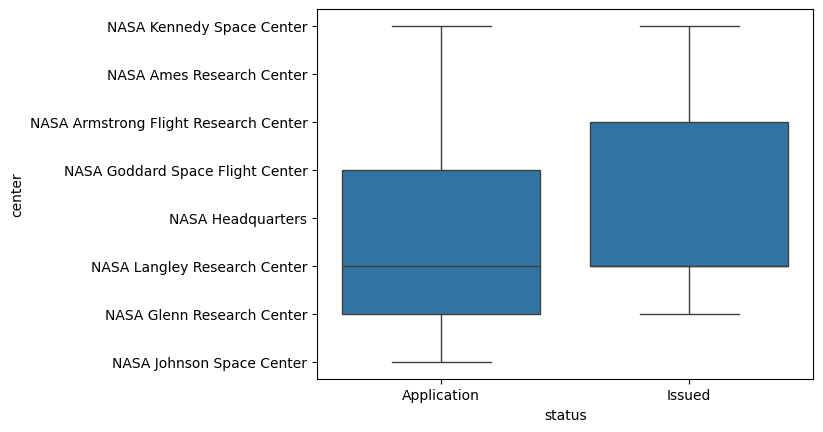

In [42]:
#Plotting a box plot
sns.boxplot(x="status",y="center",data=df)

In [44]:
#summarizing Categorical Data 
pd.crosstab(df['status'],df['center'])

center,NASA Ames Research Center,NASA Armstrong Flight Research Center,NASA Glenn Research Center,NASA Goddard Space Flight Center,NASA Headquarters,NASA Johnson Space Center,NASA Kennedy Space Center,NASA Langley Research Center
status,,,,,,,,
Application,38,9,103,64,0,1,29,110
Issued,100,12,107,129,1,0,58,239


In [5]:
# Creating a piviot table 
pd.pivot_table(df,index=['status'],columns=['center'],aggfunc=len)
            

application_sn                                        \
center      NASA Ames Research Center NASA Armstrong Flight Research Center   
status                                                                        
Application                      38.0                                   9.0   
Issued                          100.0                                  12.0   

                                                                         \
center      NASA Glenn Research Center NASA Goddard Space Flight Center   
status                                                                    
Application                      103.0                             64.0   
Issued                           107.0                            129.0   

                                                         \
center      NASA Headquarters NASA Johnson Space Center   
status                                                    
Application               NaN                       1.0   
Issued                    1.0                       NaN   

                                                                    \
center      NASA Kennedy Space Center NASA Langley Research Center   
status                                                               
Application                      29.0                        110.0   
Issued                           58.0                        239.0   

                          case_number                                        \
center      NASA Ames Research Center NASA Armstrong Flight Research Center   
status                                                                        
Application                      38.0                                   9.0   
Issued                          100.0                                  12.0   

             ...             patent_number                               \
center       ... NASA Kennedy Space Center NASA Langley Research Center   
status       ...                                                          
Application  ...                      29.0                        110.0   
Issued       ...                      58.0                        239.0   

                                title                                        \
center      NASA Ames Research Center NASA Armstrong Flight Research Center   
status                                                                        
Application                      38.0                                   9.0   
Issued                          100.0                                  12.0   

                                                                         \
center      NASA Glenn Research Center NASA Goddard Space Flight Center   
status                                                                    
Application                      103.0                             64.0   
Issued                           107.0                            129.0   

                                                         \
center      NASA Headquarters NASA Johnson Space Center   
status                                                    
Application               NaN                       1.0   
Issued                    1.0                       NaN   

                                                                    
center      NASA Kennedy Space Center NASA Langley Research Center  
status                                                              
Application                      29.0                        110.0  
Issued                           58.0                        239.0  

[2 rows x 40 columns]

In [32]:
#Patents Issued Each year 
New_df

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,2024-10-05
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,pending,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09
996,NASA Glenn Research Center,Application,LEW-18928-1,pending,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,2024-10-05
997,NASA Glenn Research Center,Application,LEW-18934-1,pending,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23
998,NASA Glenn Research Center,Application,LEW-18939-1,pending,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13


In [43]:
Total_IssuedPatent_by_center=New_df[New_df['status'] == 'Issued'].groupby("center").agg({"status":"count"})
Total_IssuedPatent_by_center=Total_IssuedPatent_by_center.rename(columns={"status":"Issued_Patents"})
Total_IssuedPatent_by_center.reset_index(inplace=True)
Total_IssuedPatent_by_center

,center,Issued_Patents
0,NASA Ames Research Center,100
1,NASA Armstrong Flight Research Center,12
2,NASA Glenn Research Center,107
3,NASA Goddard Space Flight Center,129
4,NASA Headquarters,1
5,NASA Kennedy Space Center,58
6,NASA Langley Research Center,239


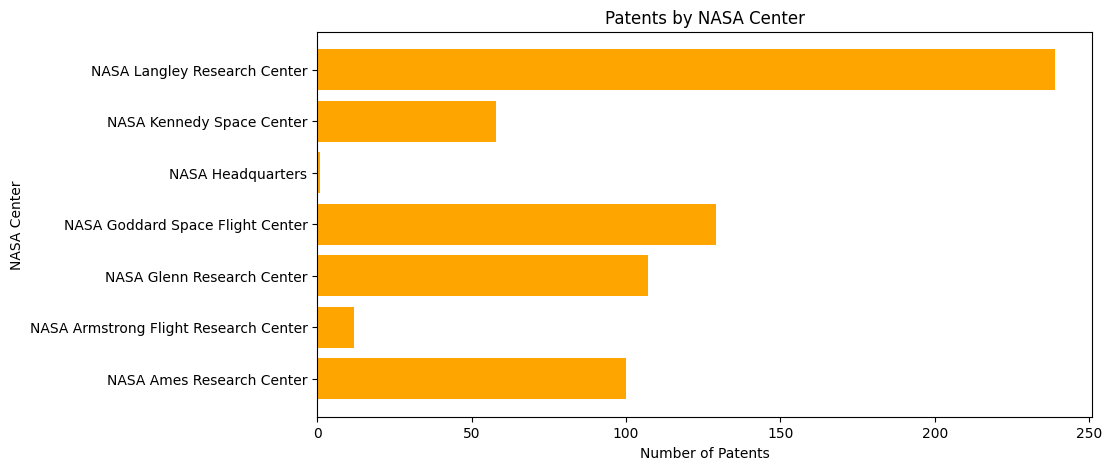

In [55]:

plt.figure(figsize=(10, 5))
plt.barh(Total_IssuedPatent_by_center['center'], Total_IssuedPatent_by_center['Issued_Patents'], color='orange')
plt.title("Patents by NASA Center")
plt.xlabel("Number of Patents")
plt.ylabel("NASA Center")

plt.show()
#NASA Langley Research center has been the top inventor and has contributed to 35% of total patents

In [73]:
#Patent status analysis


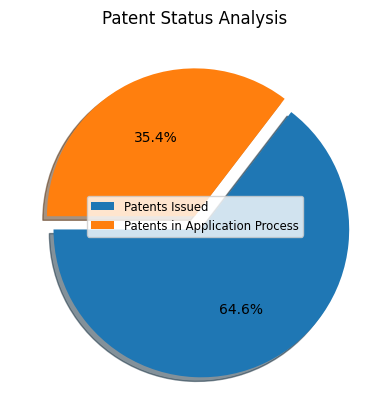

Patents Status:-- status
Issued         646
Application    354
Name: count, dtype: int64


In [113]:


def Patents_Status_Analysis(df): 
 patent_status_analysis=df['status'].value_counts()   
 exp = (0.1, 0)
 plt.pie(patent_status_analysis, autopct='%1.1f%%',startangle=180,explode=exp,shadow=True)
 plt.legend(labels=['Patents Issued', 'Patents in Application Process'], loc='center', fontsize='small')
 plt.title("Patent Status Analysis")
 plt.show()
 print("Patents Status:--",patent_status_analysis)
Patents_Status_Analysis(df_cleaned)

# 353 Patents are yet to be issued and are in process and 642 are the total issued patents


In [119]:
#Percentage of patents yet to be issued is 35.5%

In [56]:
New_df['title']

0                Polyimide Wire Insulation Repair System
1      Autogenic-Feedback Training Exercise Method & ...
2      Multimodality Instrument For Tissue Characteri...
3                        Metrics For Body Sensing System
4      Multimodality Instrument For Tissue Characteri...
                             ...                        
995    New Power Source For Deep Space Missions- Util...
996    Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...
997        Conditionally Active Min-Max Limit Regulators
998    Magnetostrictive Alternator - Low cost, No mov...
999                       Adaptive Phase Delay Generator
Name: title, Length: 1000, dtype: object

In [165]:
# Load the issued patents data
PatentData=New_df.drop(columns=["center","case_number","patent_number","application_sn","patent_expiration_date"])
PatentData
PatentData['title'] = PatentData['title'].astype(str) 
PatentData.dtypes

status    object
title     object
dtype: object

In [120]:


PatentData_df=PatentData.copy()


In [162]:
PatentData_df['status']=PatentData_df['status'].replace('Issued', 1).replace('Application', 0)


PatentData_df['title'] = PatentData_df['title'].astype('str') 


status     int64
title     object
dtype: object

In [171]:
import re

PatentData_df['title'] = PatentData_df['title'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)


In [184]:
#Predicting the  probability of a patent being approved based on the features of the title using logistic regression.

# Split the feature matrix into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(PatentData_df['title'], PatentData_df['status'],test_size=0.2)

vectorizer = TfidfVectorizer(max_features=4000)

# Fit the vectorizer to the title column of the patent data and transform it into a feature matrix
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the performance of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

# Use the model to predict the status of the pending patents
pending_patents_pred = model.predict(vectorizer.transform(PatentData_df['title']))

# Print the predicted status of the pending patents
print('Predicted Status of Pending Patents:')
print(pending_patents_pred)
from sklearn.metrics import  f1_score


# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score", f1)

Accuracy: 0.645
Precision: 0.6482412060301508
Recall: 0.9923076923076923
Predicted Status of Pending Patents:
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 